# Projets -  idées  innovantes d’applications en lien avec l'alimentation

## Résumé 

On veut savoir les aliments les plus addapté pour une personne que envisage d'aquerir de bonnes habitudes alimentaires. On cherche donc à prédire la présence de graisses saturées, omega 3, omega, omega 9, du sel et sucre non necessaire, vitamines, fibres, mineraux, proteines et calcium. Cela en evitant les additifs et on previlegient les aliments avec un nutriscore et ecoscore favorable.

## Méthode 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

### Telechargement des données

In [2]:
pd.set_option("display.precision", 2)          
pd.set_option("display.max.columns", None)    
pd.set_option("display.max.rows", None)

file = pathlib.Path('../../P3/DATA/FR.openfoodfacts.org.products.csv')

if file.exists ():
    df =pd.read_csv('../../P3/DATA/FR.openfoodfacts.org.products.csv')
    print ("File exist")
else:
    df = pd.read_csv("../../P3/DATA/en.openfoodfacts.org.products.csv",
                     sep="\t", encoding="utf-8", nrows=15000, low_memory=False)
    df['countries_en']=df['countries_en'].fillna('MISSING COUNTRY')
    #Selectioner seulement les donnees du marche Français
    mask = (df['countries_en'].str.contains('France', regex=False))
    df = df[mask]
    df.to_csv ('../../P3/DATA/FR.openfoodfacts.org.products.csv', index = False, header=True)
    print ("Create FR File")
    

File exist


In [3]:
df.head().T.to_excel("../../P3/FIGURES/e.xlsx")

#### Traiter les doublons

In [4]:
df_dup = df.duplicated().sum()
if df_dup>0:
    df = df.drop_duplicates()
    print('Total doublons:  ',df_dup)

In [5]:
List_projet =  ['product_name','categories','nutriscore_grade','nutriscore_score','nova_group','ecoscore_grade_fr','ecoscore_score_fr',
                'countries_en','origins_tags','labels','allergens','additives_en','ingredients_from_palm_oil_n',
                'ingredients_that_may_be_from_palm_oil_n','fat_100g','saturated-fat_100g','energy-kcal_100g','energy-kj_100g',
                'carbon-footprint-from-meat-or-fish_100g','carbohydrates_100g','omega-3-fat_100g','omega-6-fat_100g','omega-9-fat_100g',
                'cholesterol_100g','trans-fat_100g','sugars_100g','proteins_100g','salt_100g','sodium_100g',
                'alcohol_100g','vitamin-a_100g','vitamin-d_100g','vitamin-e_100g',
                'vitamin-k_100g','vitamin-c_100g','vitamin-b1_100g','vitamin-b2_100g','vitamin-pp_100g','calcium_100g',
                'vitamin-b6_100g','vitamin-b9_100g','vitamin-b12_100g','fruits-vegetables-nuts_100g']
filtered_df = df.loc[:,List_projet]

In [6]:
def remove_outlier(df_in,q1value,q3value):
    import copy
    df_out = copy.deepcopy(df_in)
    
    q1 =df_in.quantile(q1value)
    q3 =df_in.quantile(q3value)
    iqr = q3-q1  
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    #===== Remove
    df_out = df_in[~((df_in < fence_low) |(df_in > fence_high)).any(axis=1)]
    return df_out

In [7]:
def isnull_values_sum(df):
    taille = len(df)/2
    null   = df.isnull().sum() 
    b=null.le(taille)
    cols_to_keep = df.columns[b]
    df = df.loc[:, cols_to_keep]
    return df

In [8]:
def group_and_loc_group(df,categ):
    grouped = df.groupby(categ, as_index=False)
    df_grouped=[]
    for i in grouped.groups.keys():
        loc=grouped.groups[i]
        df_grouped.append(pd.DataFrame(df.iloc[loc]))
    return grouped, df_grouped

In [9]:
def plot_box_plot(df,xlabel_name,ylabel_name):
    color = dict(boxes='black', whiskers='black', medians='red', caps='black')
    ax = df.plot.box(color=color,whiskerprops = dict(linestyle='-',linewidth=2.0, color='black'),figsize=(24, 8),fontsize=18)
    ax.set_xlabel(xlabel_name,fontsize=18)
    ax.set_ylabel(ylabel_name,fontsize=18)
    plt.grid(color='k', linestyle='-', linewidth=.1)
    plt.xticks(rotation=90)
    ax.label_outer() 

    plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

#### Traiter les valeurs aberrants

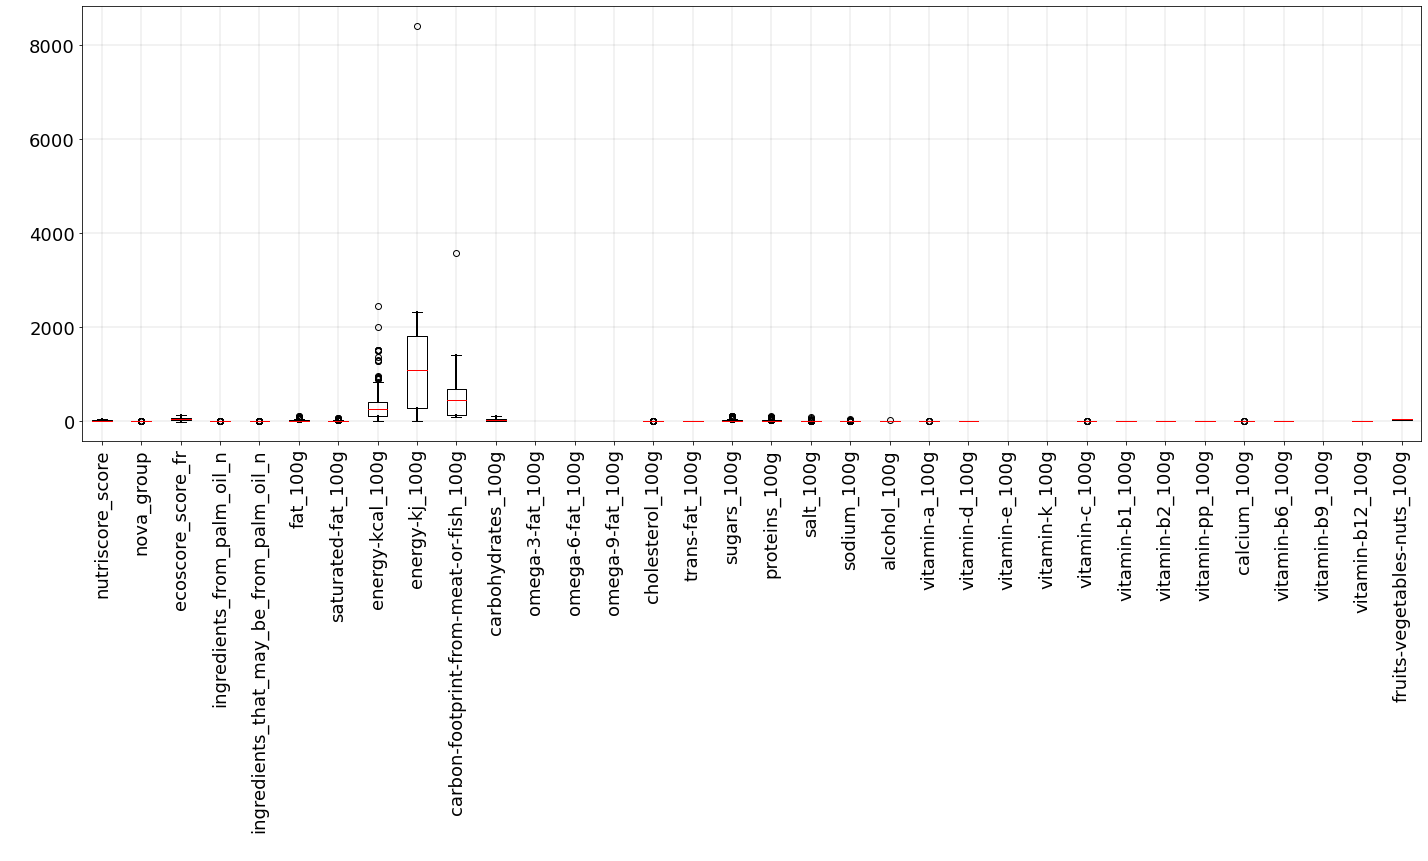

In [10]:
figure_name ='../../P3/FIGURES/Outliers.jpeg'

ylabel = " "
xlabel = " "
ax = plot_box_plot(filtered_df,xlabel,ylabel)

In [11]:
q1value=0.05
q3value=0.95
df1 = remove_outlier(filtered_df,q1value,q3value)

<ipython-input-6-0d6550d21d0c>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df_in[~((df_in < fence_low) |(df_in > fence_high)).any(axis=1)]
<ipython-input-6-0d6550d21d0c>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df_in[~((df_in < fence_low) |(df_in > fence_high)).any(axis=1)]


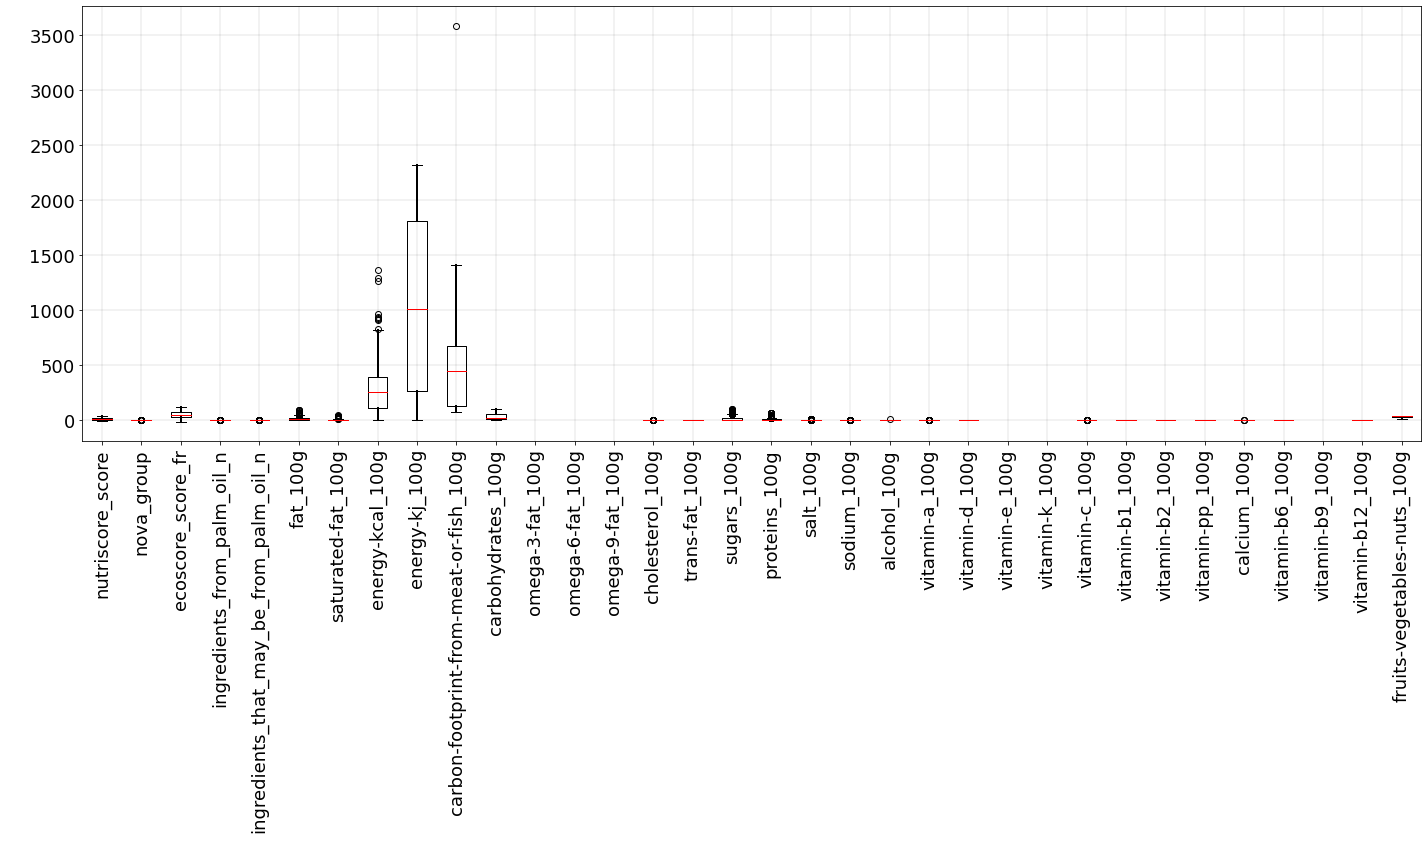

In [12]:
figure_name ='../../P3/FIGURES/Outliers.jpeg'

ylabel = " "
xlabel = " "
ax = plot_box_plot(df1,xlabel,ylabel)

Energy_cal_100g, energy_kj_100g et carbon-footprint-from-meat-or-fish_100g ont des valeurs 
aberrant tres eleve. Je vais appliquer unfiltrage pour chaque variable

#### Traiter les valeurs manquants

In [13]:
Null = df1.isnull().sum() 
Na = df1.isna().sum()
df_NaN = pd.DataFrame(data=Na)
print(df_NaN)

                                            0
product_name                              154
categories                               1252
nutriscore_grade                         1462
nutriscore_score                         1462
nova_group                               1643
ecoscore_grade_fr                        1574
ecoscore_score_fr                        1574
countries_en                                0
origins_tags                             2006
labels                                   1648
allergens                                1905
additives_en                             1746
ingredients_from_palm_oil_n              1555
ingredients_that_may_be_from_palm_oil_n  1555
fat_100g                                  639
saturated-fat_100g                        633
energy-kcal_100g                          647
energy-kj_100g                           2007
carbon-footprint-from-meat-or-fish_100g  2031
carbohydrates_100g                        639
omega-3-fat_100g                  

##### Most of the variables has more than half data missing. There is no point of using those variables (eg. omega 3, omega, omega 9, vitamines, fibres, mineraux et ecoscore). Thus they will be excluded from our dataset needed for this project

Je fait le choix de dans un premier temps supprimer certain variables que sont truffée de données manquantes (plus de 50% de valeurs manquantes) 


In [14]:
df_final = isnull_values_sum(df1)

In [ ]:
VAMOS ENBORA

1
 J'ai fait le choix de ne pas imputer les valeurs manquantes cars pour mon projet, cela engendrait des erreurs sur la proposition des produits sain.